In [4]:
import time as tm
import numpy as np
import urllib as ull
import plotly.offline as plt
import plotly.graph_objs as pltGo

from bs4 import BeautifulSoup
from bs4 import SoupStrainer

In [ ]:
yrsAvailable = [str(k)[2:] for k in range(1992, 2019)]
articleNum = []

for yr in yrsAvailable:
    
    tm.sleep(0.5)
    arxiv ='https://arxiv.org/year/cond-mat/' + yr
    
    with ull.request.urlopen(arxiv) as arxivUll:
        onlyP = SoupStrainer('p')
        arxivSoup = BeautifulSoup(arxivUll, parse_only=onlyP)  
        parsed = [
            k.split(' ')[0]
            for k in arxivSoup.stripped_strings 
            if 'articles' in k.split(' ') or 'cross-lists' in k.split(' ')] [1:]
        
    articleNum.append(int(parsed[0]) + int(parsed[1]))

articleNum = list(zip(list(range(1992, 2019)), articleNum))

Over two decades, the number of Condensed Matter pre-prints posted to arXiv has ballooned by nearly a factor of 70! Now let's look at the full list for a particular list and try to get some information about the articles posted.

Total number of articles:  256668


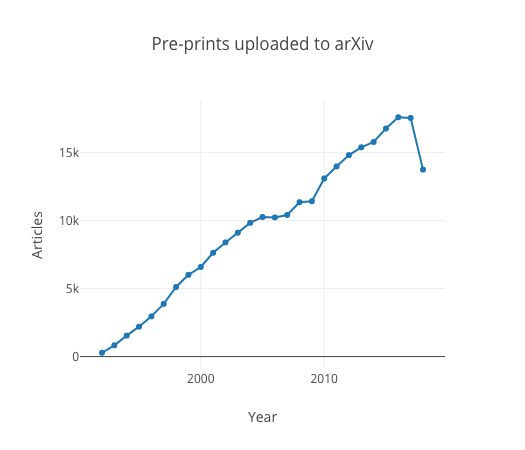

In [5]:
print('Total number of articles: ', sum(list(zip(*articleNum))[1]))
x = list(zip(*articleNum))[0]
y = list(zip(*articleNum))[1]

totScatter = pltGo.Scatter(x=x, y=y, mode='lines+markers', )
totLayout = pltGo.Layout(title='Pre-prints uploaded to arXiv', xaxis={'title': 'Year'}, yaxis={'title': 'Articles'})
totFigure = pltGo.Figure(data=[totScatter], layout=totLayout)

plt.iplot(totFigure)
# plt.iplot(data=pltScatter)

That's a quarter million papers posted within the condensed matter sub-arXiv in the past 20 years!! Presumably we can do a lot with all of this information. 

In [88]:
articleTitles = []
arxivList = 'https://arxiv.org/list/cond-mat/92?show=283'

with ull.request.urlopen(arxivList) as arxivUll:
        onlyA = SoupStrainer('dd')
        arxivSoup = BeautifulSoup(arxivUll, parse_only=onlyA)
        articleTitles = []
        
for k in arxivSoup.find_all('dd'):
    articleTitles.append(list(k.stripped_strings)[1])

In [81]:
arxiv ='https://arxiv.org/list/cond-mat/92?show=283'

with ull.request.urlopen(arxiv) as arxivUll:
    strain = SoupStrainer('dt')
    arxivSoup = BeautifulSoup(arxivUll, parse_only=strain)  